In [1]:
import seaborn as sns
import pandas as pd
data = pd.read_csv(r"C:\Users\Sarah\Downloads\Fitbit2.csv") 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


<AxesSubplot:xlabel='NumberOfAwakings', ylabel='MinutesOfBeingAwake'>

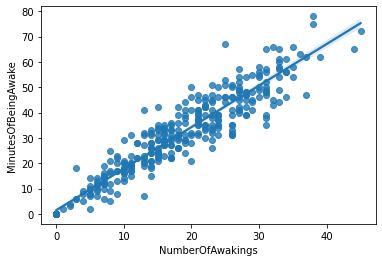

In [2]:
#doing the regression plot 
# here I assume that minutes of being awake (Y - dependant) depends on number of times I was awake (X-independant)
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)
# we can see from the scatter plot that the correlation is quite high

In [3]:
from scipy import stats
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
# intercept is B0 = where we cross the Y axis, what is the value of Y is X is zero
# slope what is the relation between this X and Y  (how Y in affected by change of X) - shows dependancies


The slope is: 1.6405141436199782
The intercept is: 1.438103352378338


Multiple linear regression


In [4]:
# need to have several x to have multiple linear regression
X=data[["Minutes Sedentary","Minutes Lightly Active", "Minutes Fairly Active", "Minutes Very Active","Activity Calories"]]
X

,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,1.355,46,0,0,1680
1,611.000,316,61,60,2248
2,602.000,226,14,77,1719
3,749.000,190,23,4,9620
4,876.000,171,0,0,7360
...,...,...,...,...,...
362,599.000,275,49,79,236
363,684.000,333,10,55,2075
364,701.000,287,29,90,2249
365,575.000,298,8,85,2112


In [5]:
# trying to use another method 
import statsmodels.api as sm
X = sm.add_constant(X) #add constant of X 
model = sm.OLS(Y,X) # ordinaly listed squared from Y and X - Creating the model
results = model.fit() # fit my model to achieve the results
predictions = results.predict(X) #predictions is the calculation of ^y (y theoretical) of X, but we want Y so we check the parameters 
# 

C:\Users\Sarah\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [6]:
#I want to see the parameters 
results.params 
# const is our intercept 
# others are the slope coefficient 

const                     12.151684
Minutes Sedentary          0.011452
Minutes Lightly Active     0.016812
Minutes Fairly Active      0.068821
Minutes Very Active        0.054627
Activity Calories          0.000818
dtype: float64

In [7]:
predictions

0      14.314663
1      33.775774
2      29.421001
3      33.593107
4      31.078159
         ...    
362    31.515472
363    30.973043
364    33.756238
365    30.667818
366    27.583879
Length: 367, dtype: float64

In [8]:
# 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
churnData = pd.read_csv(r"C:\Users\Sarah\Downloads\Customer-Churn.csv")
numericData = churnData[['tenure','SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
classification = LogisticRegression(random_state=0,
solver='lbfgs',multi_class='ovr').fit(scaled_x, churnData['Churn'])

In [9]:
residuals = [Y[i] - predictions[i] for i in range(len(Y))]

KeyError: 0

In [ ]:
residuals

In [10]:
import numpy as np
# if you know residuals you can calculate RMSE 
RMSE = np.sqrt(np.mean([residual**2 for residual in residuals]))


NameError: name 'residuals' is not defined

In [11]:
RMSE

NameError: name 'RMSE' is not defined

In [12]:
#r2 should be as close as possible to 1, so here it is not very good (0.06) - meaning model is not good
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(Y, predictions))
r2_score(Y, predictions)


ValueError: Found input variables with inconsistent numbers of samples: [7043, 367]

In [ ]:
from scipy.stats import linregress

auto = pd.read_csv(r"C:\Users\Sarah\Downloads\auto-mpg.csv")
auto.head()

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(auto.acceleration, auto.mpg)
slope, intercept, r_value, p_value, std_err

In [ ]:
import statsmodels.api as sm
#regression model with other library
#here we can print the model summary 

X = sm.add_constant(auto.acceleration) # We must add the intercept using the add_constant function
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

# R-squared: percentage of variance ethat can be described by model 

In [ ]:
X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']]) # adding a constant
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#p_value is very low so very significant => our model is very significant 